In [31]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import datetime as dt
from IPython.display import YouTubeVideo
%matplotlib inline

Hello ,

This is a small data analysis on an S & P 500 Data Set.
I already made a Tableau Dashboard, for some visualisation.
It would be nice, if you look it up too. <br>
https://public.tableau.com/profile/florian.hox#!/vizhome/SP500_16096350014860/Dashboard1 <br>

If some errors occure just re-execute the line<br>
But now, let's start with the analysis!

# Import / Merge of data
In this part i just import and merge the data, so we can use them later. You can skip it if you are only interested in the analysis / visualisation.

In [2]:
history= pd.read_excel("./all_stocks_5yr.xlsx")
stocks = pd.read_excel("./full_financial_stocks_raw.xlsx")

In [3]:
stocks.drop(stocks.columns[[9,10,11,12,13,14]], axis = 1, inplace = True) 

In [4]:
history

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [5]:
stocks

,Symbol,Security,GICS Sector,GICS Sub-Industry,Date first added,CIK,Founded,City,State,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,MMM,3M Company,Industrials,Industrial Conglomerates,1976-08-09 00:00:00,66740,1902,St. Paul,Minnesota,NaN,NaN,NaN,NaN
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment,1964-03-31 00:00:00,1800,1888,North Chicago,Illinois,NaN,NaN,NaN,NaN
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,2012-12-31 00:00:00,1551152,2013 (1888),North Chicago,Illinois,NaN,NaN,NaN,NaN
3,ABMD,ABIOMED Inc,Health Care,Health Care Equipment,2018-05-31 00:00:00,815094,1981,Danvers,Massachusetts,NaN,NaN,NaN,NaN
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services,2011-07-06 00:00:00,1467373,1989,Dublin,Ireland,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,1997-10-06 00:00:00,1041061,1997,Louisville,Kentucky,NaN,NaN,NaN,NaN
501,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,2019-12-23 00:00:00,877212,1969,Lincolnshire,Illinois,NaN,NaN,NaN,NaN
502,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,2001-08-07 00:00:00,1136869,1927,Warsaw,Indiana,NaN,NaN,NaN,NaN
503,ZION,Zions Bancorp,Financials,Regional Banks,2001-06-22 00:00:00,109380,1873,Salt Lake City,Utah,NaN,NaN,NaN,NaN


In [6]:
df = pd.merge(stocks,history,left_on='Symbol',right_on='Name')
df.drop(df.columns[[9,10,11,12]], axis = 1, inplace = True)
df['date']= pd.to_datetime(df['date'])
df['date']=df['date'].map(dt.datetime.toordinal)
df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Date first added,CIK,Founded,City,State,date,open,high,low,close,volume,Name
0,MMM,3M Company,Industrials,Industrial Conglomerates,1976-08-09 00:00:00,66740,1902,St. Paul,Minnesota,734907,102.34,103.330,102.0400,102.66,1937721,MMM
1,MMM,3M Company,Industrials,Industrial Conglomerates,1976-08-09 00:00:00,66740,1902,St. Paul,Minnesota,734910,102.39,102.880,102.0401,102.62,1715444,MMM
2,MMM,3M Company,Industrials,Industrial Conglomerates,1976-08-09 00:00:00,66740,1902,St. Paul,Minnesota,734911,102.66,103.590,102.6300,103.46,1927930,MMM
3,MMM,3M Company,Industrials,Industrial Conglomerates,1976-08-09 00:00:00,66740,1902,St. Paul,Minnesota,734912,103.03,103.395,102.5800,102.86,1699804,MMM
4,MMM,3M Company,Industrials,Industrial Conglomerates,1976-08-09 00:00:00,66740,1902,St. Paul,Minnesota,734913,102.43,103.140,102.2200,102.78,2217419,MMM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532546,ZTS,Zoetis,Health Care,Pharmaceuticals,2013-06-21 00:00:00,1555280,1952,Florham Park,New Jersey,736726,76.84,78.270,76.6900,77.82,2982259,ZTS
532547,ZTS,Zoetis,Health Care,Pharmaceuticals,2013-06-21 00:00:00,1555280,1952,Florham Park,New Jersey,736727,77.53,78.120,76.7300,76.78,2595187,ZTS
532548,ZTS,Zoetis,Health Care,Pharmaceuticals,2013-06-21 00:00:00,1555280,1952,Florham Park,New Jersey,736730,76.64,76.920,73.1800,73.83,2962031,ZTS
532549,ZTS,Zoetis,Health Care,Pharmaceuticals,2013-06-21 00:00:00,1555280,1952,Florham Park,New Jersey,736731,72.74,74.560,72.1300,73.27,4924323,ZTS


# Data-prepping  

I have written a resumé at the end of this part, so you do not have to comprehend what i have done.

In [7]:
def return_stock(Ticker):
    return df.query('Symbol == @Ticker')

In [8]:
def return_first_last(Ticker):
    x = df.query('Symbol == @Ticker')
    first_last = x.iloc[[0, -1]]
    return first_last

In [9]:
def get_return(Ticker):
    x = df.query('Symbol == @Ticker')
    r = x.iloc[-1]['close'] / x.iloc[0]['close']
    return r

In [10]:
tickers = df.Symbol.unique()
returns = pd.DataFrame()
returns['Name'] = np.resize(tickers,len(tickers))
r=[]
for i in tickers:
    r.append(round(get_return(i),4))
returns['Return'] = r

In [11]:
stock_return=pd.merge(stocks,returns,left_on='Symbol',right_on='Name')
stock_return.drop(stock_return.columns[[9,10,11,12]], axis = 1, inplace = True) 
stock_return


,Symbol,Security,GICS Sector,GICS Sub-Industry,Date first added,CIK,Founded,City,State,Name,Return
0,MMM,3M Company,Industrials,Industrial Conglomerates,1976-08-09 00:00:00,66740,1902,St. Paul,Minnesota,MMM,2.2715
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment,1964-03-31 00:00:00,1800,1888,North Chicago,Illinois,ABT,1.7050
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,2012-12-31 00:00:00,1551152,2013 (1888),North Chicago,Illinois,ABBV,3.1343
3,ACN,Accenture plc,Information Technology,IT Consulting & Other Services,2011-07-06 00:00:00,1467373,1989,Dublin,Ireland,ACN,2.1164
4,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,2015-08-31 00:00:00,718877,2008,Santa Monica,California,ATVI,5.1797
...,...,...,...,...,...,...,...,...,...,...,...
427,XYL,Xylem Inc.,Industrials,Industrial Machinery,2011-11-01 00:00:00,1524472,2011,White Plains,New York,XYL,2.6501
428,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,1997-10-06 00:00:00,1041061,1997,Louisville,Kentucky,YUM,1.2271
429,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,2001-08-07 00:00:00,1136869,1927,Warsaw,Indiana,ZBH,1.5924
430,ZION,Zions Bancorp,Financials,Regional Banks,2001-06-22 00:00:00,109380,1873,Salt Lake City,Utah,ZION,2.2378


In [12]:
stock_return_gb_sec = stock_return.groupby(stock_return.columns[2])
return_agg_sec= stock_return_gb_sec.agg({
    'Return' : ['mean']
})

In [13]:
count_sec = stock_return[stock_return.columns[2]].value_counts()

In [14]:
stock_return['Profitability'] = np.where(stock_return['Return']>=1.0, 'profit', 'loss')
stock_return

,Symbol,Security,GICS Sector,GICS Sub-Industry,Date first added,CIK,Founded,City,State,Name,Return,Profitability
0,MMM,3M Company,Industrials,Industrial Conglomerates,1976-08-09 00:00:00,66740,1902,St. Paul,Minnesota,MMM,2.2715,profit
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment,1964-03-31 00:00:00,1800,1888,North Chicago,Illinois,ABT,1.7050,profit
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,2012-12-31 00:00:00,1551152,2013 (1888),North Chicago,Illinois,ABBV,3.1343,profit
3,ACN,Accenture plc,Information Technology,IT Consulting & Other Services,2011-07-06 00:00:00,1467373,1989,Dublin,Ireland,ACN,2.1164,profit
4,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,2015-08-31 00:00:00,718877,2008,Santa Monica,California,ATVI,5.1797,profit
...,...,...,...,...,...,...,...,...,...,...,...,...
427,XYL,Xylem Inc.,Industrials,Industrial Machinery,2011-11-01 00:00:00,1524472,2011,White Plains,New York,XYL,2.6501,profit
428,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,1997-10-06 00:00:00,1041061,1997,Louisville,Kentucky,YUM,1.2271,profit
429,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,2001-08-07 00:00:00,1136869,1927,Warsaw,Indiana,ZBH,1.5924,profit
430,ZION,Zions Bancorp,Financials,Regional Banks,2001-06-22 00:00:00,109380,1873,Salt Lake City,Utah,ZION,2.2378,profit


# Now we have:

-a function that filters our dataframe by the ticker of the company <br>
-added Return and Profitability to our stock dataframe<br>
-grouped our data frame by the sector<br>


# Analysis / Visualisation

Now let's start with the analysis. First we look up on the low and high performer.

In [34]:
stock_return[['Security','Return']].sort_values(by='Return',ascending = False).head(30)

,Security,Return
301,Nvidia Corporation,18.4964
286,Netflix Inc.,10.2333
17,Align Technology,7.1595
145,Electronic Arts,7.0841
110,Constellation Brands,6.7237
69,Broadcom Inc.,6.7208
162,"Facebook, Inc.",6.3121
272,Micron Technology,5.4206
24,Amazon.com Inc.,5.4086
4,Activision Blizzard,5.1797


This is the List of top 30 most profitable stocks in the s & p 500. You can read the return as a factor. For example: The Nvidia stock went up 1849.64 % over the given timespan (11.02.2013 - 07.02.2018).

In [35]:
stock_return.query('Profitability == "loss"')[['Security','Return']].sort_values(by='Return',ascending = True)

,Security,Return
390,Under Armour (Class C),0.2923
128,"Discovery, Inc. (Class A)",0.3235
129,"Discovery, Inc. (Class C)",0.3398
281,The Mosaic Company,0.4112
239,Kinder Morgan,0.4598
42,Apache Corporation,0.4672
256,Marathon Oil Corp.,0.4729
284,National Oilwell Varco Inc.,0.4929
179,Freeport-McMoRan Inc.,0.5011
338,Ralph Lauren Corporation,0.6066


This is the List of the stocks that made a loss over the time spann. You can read the return again as a factor. For example: The Ford Motor Company is now 0.8214 times worth, compared to the beginning. That means a loss of 17.86 %.

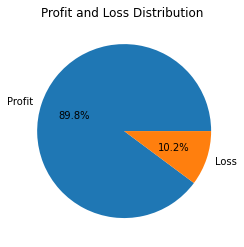

In [36]:
#stock_return['Profitability'].value_counts didn't worked
profit= 0
loss = 0
for i in stock_return['Profitability']:
    if i == 'loss':
        loss += 1
    else:
        profit +=1
fig, ax = plt.subplots()
ax.pie(x=[profit,loss], labels= ['Profit','Loss'], autopct='%1.1f%%')
ax.set_title('Profit and Loss Distribution ')


plt.show()


In [37]:
round(stock_return['Return'].mean(),4)

2.0141

In conclusion most of the stocks were profitable over this timespan. The average return was 201.41%. You should know that the weights of all the stocks are not equal and are also changed sometimes. So this is not the return of the real index fund. 
In the next line we can see the average return grouped by sector to see, which sectors are historically the best to invest in:

In [38]:
return_agg_sec.sort_values(by=[('Return','mean')], ascending = False)

,Return
,mean
GICS Sector,
Information Technology,2.686234
Communication Services,2.681110
Health Care,2.323165
Industrials,2.182687
Financials,2.078259
Consumer Discretionary,1.855996
Consumer Staples,1.799761
Materials,1.664255


As you can see the best sectors to invest in were Information Technology and Communication Services, but every sector was profitable except of the Energy sector. Now we should look on the number of stocks by category:

<AxesSubplot:>

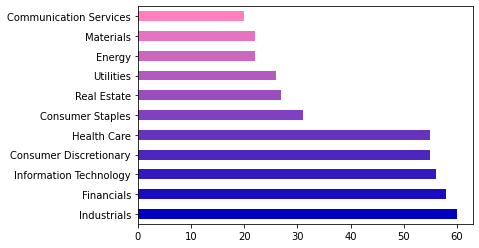

In [39]:
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(11)] 
count_sec.plot.barh(color=my_colors)

So as we can see one of the two top performers, Communication Services, is the sector with the smallest number of stocks in the S & P 500.
The sector with the biggest amounts of stocks represented is the Industrial sector.

Now we have an overview about the best and worst performances in the S & P 500.
Additional to that i want to provide a tool that can be used to make a linear regression on an individual stock:

In [44]:
def stock_regression(Ticker):
    st=return_stock(Ticker)
    Y=st['close']
    X=st[['date']]
    sr= LinearRegression()
    sr.fit(X,Y)
    YP=sr.predict(X)
    plt.plot(X,Y, label='Closing Price')
    plt.plot(X,YP, label='Prediction')
    plt.title(Ticker)
    plt.legend(loc='best')
    plt.show()
    return sr

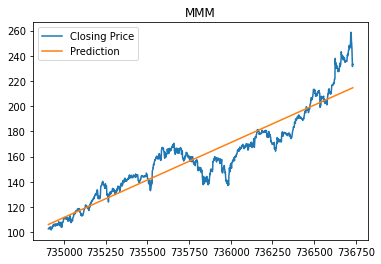

In [45]:
MMM=stock_regression('MMM')


If you want to make a prediction, just change the amount of days that will be added to the the last day (736732) to get a prediction.

In [46]:
days = 365
round(float(MMM.predict([[736732+days]])),2)

236.26

Another Example:

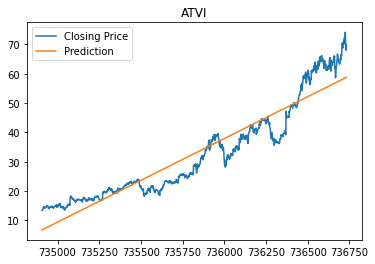

In [47]:
ATVI=stock_regression('ATVI')

In a file on git hub you can download an excel sheet with all the tickers

# Summary

Now we know the high and low performing stocks and sectors.<br>
But remember although we can use them to predict the future, in real life anything can happen and the past says nothing about the future.

Thank you for reading my analysis :D <br>

If you want to see more projects or you would like to contact me here are my important links: https://linktr.ee/florian_hx <br>
I would love to get some feedback.

Your Florian 
